In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(0)

In [3]:
def datos_sesgados(sesgo, cantidad, maximo):
    #distribucion normal sesgada
    aleatorios = stats.skewnorm.rvs(sesgo, loc = 2.5, size = cantidad, random_state = 0)
    aleatorios = aleatorios + abs(aleatorios.min())
    aleatorios = np.round(aleatorios, 2)/aleatorios.max() * maximo
    return np.round(aleatorios, 1)

In [6]:
edades = datos_sesgados(3,100000,62)

In [7]:
edades

array([38.8, 33.5, 34.2, ..., 34.3, 38.1, 37.4])

In [8]:
edades.min()

19.5

In [9]:
edades.max()

62.0

In [10]:
edades.mean()

33.26179799999999

In [12]:
tamano_muestra=100
muestra = np.random.choice(edades,tamano_muestra)
muestra

array([31.5, 34.2, 34.4, 31.1, 34.1, 35.7, 32.9, 40. , 29.1, 36.2, 36.4,
       30.3, 37.8, 31.8, 39.9, 29.9, 28.2, 31.1, 39.2, 41. , 26.7, 31.1,
       27.8, 33.7, 28.3, 35.2, 40.4, 30.7, 34. , 29.2, 42.6, 33.3, 36.1,
       29.7, 31.1, 37.3, 35.1, 36.3, 36.5, 39.9, 30. , 39.1, 37.9, 32.3,
       40.2, 34.2, 36.5, 33.6, 29.2, 45.2, 32.4, 41.9, 36.5, 38.1, 30.7,
       32.9, 33. , 32.1, 31.1, 32.6, 33.1, 32.9, 33.9, 25.9, 25.1, 35.5,
       47.5, 42.5, 33.2, 28.7, 29.3, 34.7, 32.8, 41.9, 36.2, 34.7, 32. ,
       43.8, 33.3, 36.1, 37.7, 35.7, 29. , 42. , 43.8, 30.6, 33.3, 34.2,
       37.6, 37.2, 30.3, 30.6, 30.8, 30.8, 31.4, 29.8, 25.8, 35.3, 34.5,
       29. ])

In [13]:
muestras_generadas =np.array([])
num_muestras = 1000
for i in range (num_muestras):
    muestras_generadas = np.append(muestras_generadas, np.random.choice(edades,tamano_muestra,replace = True))
muestras_generadas = muestras_generadas.reshape(-1,tamano_muestra)
muestras_generadas
                                   

array([[33.6, 30.2, 28.7, ..., 27.6, 36.2, 44.6],
       [29.8, 29.6, 32.5, ..., 34.5, 34.2, 31.6],
       [27. , 27.4, 38.6, ..., 31.1, 32.9, 30.8],
       ...,
       [29.5, 36.9, 29. , ..., 33.3, 31.7, 33.2],
       [34.2, 33.2, 32.7, ..., 31.1, 28.2, 31.4],
       [33.7, 31.4, 31.9, ..., 25. , 34.2, 30.6]])

In [14]:
muestras_generadas.shape

(1000, 100)

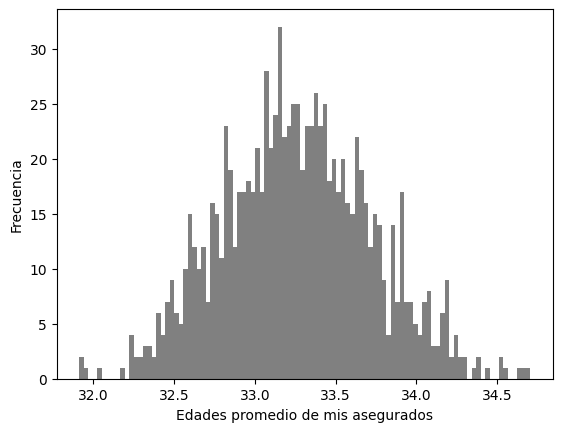

In [16]:
plt.hist(muestras_generadas.mean(axis=1),bins =100, color ="gray")
plt.xlabel("Edades promedio de mis asegurados")
plt.ylabel ("Frecuencia")
plt.show()

In [17]:
int_confianza = np.quantile(muestras_generadas.mean(axis=1),[0.025,0.975])

In [18]:
int_confianza

array([32.40395 , 34.183125])

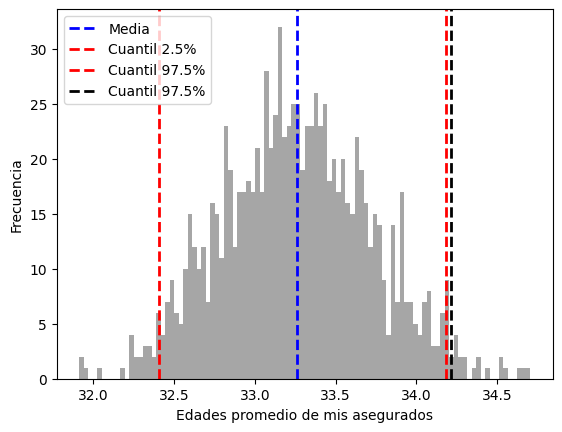

Intervalo de confianza al 95%: [32.40395  34.183125]


In [21]:

medias = muestras_generadas.mean(axis=1)
plt.hist(medias, bins=100, color="gray", alpha=0.7)

# Calcular la media y los cuantiles
media = np.mean(medias)
cuantiles = np.quantile(medias, [0.025, 0.975])

# Agregar líneas verticales para la media y los cuantiles
plt.axvline(media, color='blue', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(cuantiles[0], color='red', linestyle='dashed', linewidth=2, label='Cuantil 2.5%')
plt.axvline(cuantiles[1], color='red', linestyle='dashed', linewidth=2, label='Cuantil 97.5%')
plt.axvline(muestra.mean(), color='black', linestyle='dashed', linewidth=2, label='Cuantil 97.5%')
# Etiquetas y leyenda
plt.xlabel("Edades promedio de mis asegurados")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

# Mostrar el intervalo de confianza
print("Intervalo de confianza al 95%:", cuantiles)


In [20]:
media

33.263073000000006

In [22]:
muestra.mean()

34.218

In [23]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import datetime
import yfinance as yf

# Crear un rango de fechas desde el 18 de octubre de 2023 hasta el 18 de octubre de 2024
start_date = '2023-10-18'
end_date = '2024-10-18'

# Descargar los datos del Bitcoin usando yfinance
bitcoin_data = yf.download('BTC-USD', start=start_date, end=end_date)

# Crear un DataFrame con las fechas y los valores de cierre del Bitcoin
val_bitcoin = pd.DataFrame({
    'Date': bitcoin_data.index,
    'Bitcoin_Value': bitcoin_data['Close']
})

# Mostrar el DataFrame
print(val_bitcoin)


Failed to get ticker 'BTC-USD' reason: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Max retries exceeded with url: /v8/finance/chart/BTC-USD?range=1d&interval=1d&crumb=sqNb5OmzyKy (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1147)')))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BTC-USD']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [31]:
# Cargar el archivo CSV en un DataFrame
val_bitcoin = pd.read_csv(r'bitcoin2.csv')

In [32]:
val_bitcoin

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-10-18 00:00:00+00:00,28328.341797,28328.341797,28889.009766,28174.251953,28413.531250,12724128586
1,2023-10-19 00:00:00+00:00,28719.806641,28719.806641,28892.474609,28177.988281,28332.416016,14448058195
2,2023-10-20 00:00:00+00:00,29682.949219,29682.949219,30104.085938,28601.669922,28732.812500,21536125230
3,2023-10-21 00:00:00+00:00,29918.412109,29918.412109,30287.482422,29481.751953,29683.380859,11541146996
4,2023-10-22 00:00:00+00:00,29993.896484,29993.896484,30199.433594,29720.312500,29918.654297,10446520040
...,...,...,...,...,...,...,...
361,2024-10-13 00:00:00+00:00,62851.375000,62851.375000,63272.652344,62035.636719,63192.945312,18177529690
362,2024-10-14 00:00:00+00:00,66046.125000,66046.125000,66482.492188,62442.152344,62848.398438,43706958056
363,2024-10-15 00:00:00+00:00,67041.109375,67041.109375,67881.679688,64809.195312,66050.367188,48863870879
364,2024-10-16 00:00:00+00:00,67612.718750,67612.718750,68375.289062,66758.726562,67042.460938,38195189534


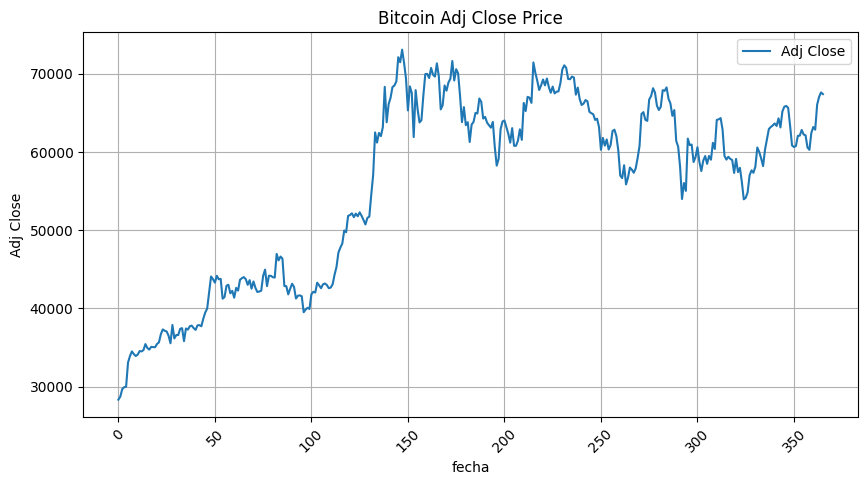

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(val_bitcoin['Adj Close'], label='Adj Close')
plt.xlabel('fecha')
plt.ylabel('Adj Close')
plt.title('Bitcoin Adj Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [44]:
bitcoin = pd.DataFrame({
    'fecha': val_bitcoin.index,         
    'Close': val_bitcoin['Adj Close']  
})
bitcoin['retorno'] = np.log(val_bitcoin['Adj Close'] / val_bitcoin['Adj Close'].shift(-1))
bitcoin = bitcoin.sort_values(by='fecha', ascending=False)
bitcoin = bitcoin.reset_index(drop=True)
num_registros = 100 # se quema valor para visualizar 
bitcoin = bitcoin.head(num_registros) 
print(f"Se seleccionaron {num_registros} registros aleatorios para bitcoin.")
print(bitcoin)

Se seleccionaron 100 registros aleatorios para bitcoin.
    fecha         Close   retorno
0     365  67399.835938       NaN
1     364  67612.718750  0.003154
2     363  67041.109375 -0.008490
3     362  66046.125000 -0.014953
4     361  62851.375000 -0.049581
..    ...           ...       ...
95    270  60787.792969 -0.064999
96    269  59231.953125 -0.025928
97    268  57899.464844 -0.022753
98    267  57344.914062 -0.009624
99    266  57742.496094  0.006909

[100 rows x 3 columns]


[[-0.02291143  0.00509037  0.00168357 ... -0.0107566  -0.00936755
   0.01354163]
 [ 0.00225971  0.01818596 -0.0116727  ... -0.03176403  0.03721355
  -0.01495264]
 [-0.00400401  0.03576248  0.00383726 ...  0.07363199  0.00531411
  -0.01288091]
 ...
 [ 0.04015297 -0.00930963 -0.03598749 ...  0.00509037 -0.00349313
   0.00690925]
 [ 0.00931261 -0.04958055 -0.0107566  ...  0.03576248  0.01305211
   0.00931261]
 [-0.00147305 -0.00936755  0.00811202 ... -0.01711366 -0.00353292
  -0.03176403]]
    fecha         Close   retorno
0     365  67399.835938       NaN
1     364  67612.718750  0.003154
2     363  67041.109375 -0.008490
3     362  66046.125000 -0.014953
4     361  62851.375000 -0.049581
..    ...           ...       ...
95    270  60787.792969 -0.064999
96    269  59231.953125 -0.025928
97    268  57899.464844 -0.022753
98    267  57344.914062 -0.009624
99    266  57742.496094  0.006909

[100 rows x 3 columns]
DataFrame actualizado con las nuevas columnas:
     retorno         Close  v

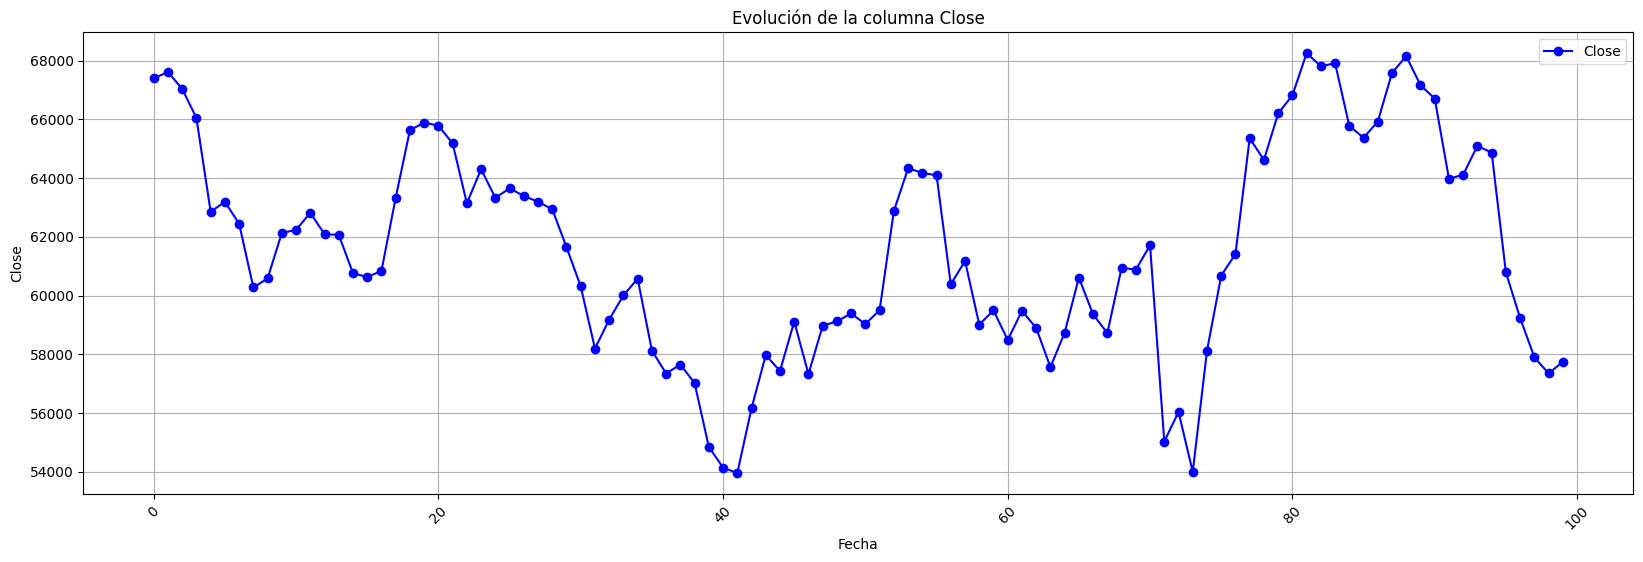

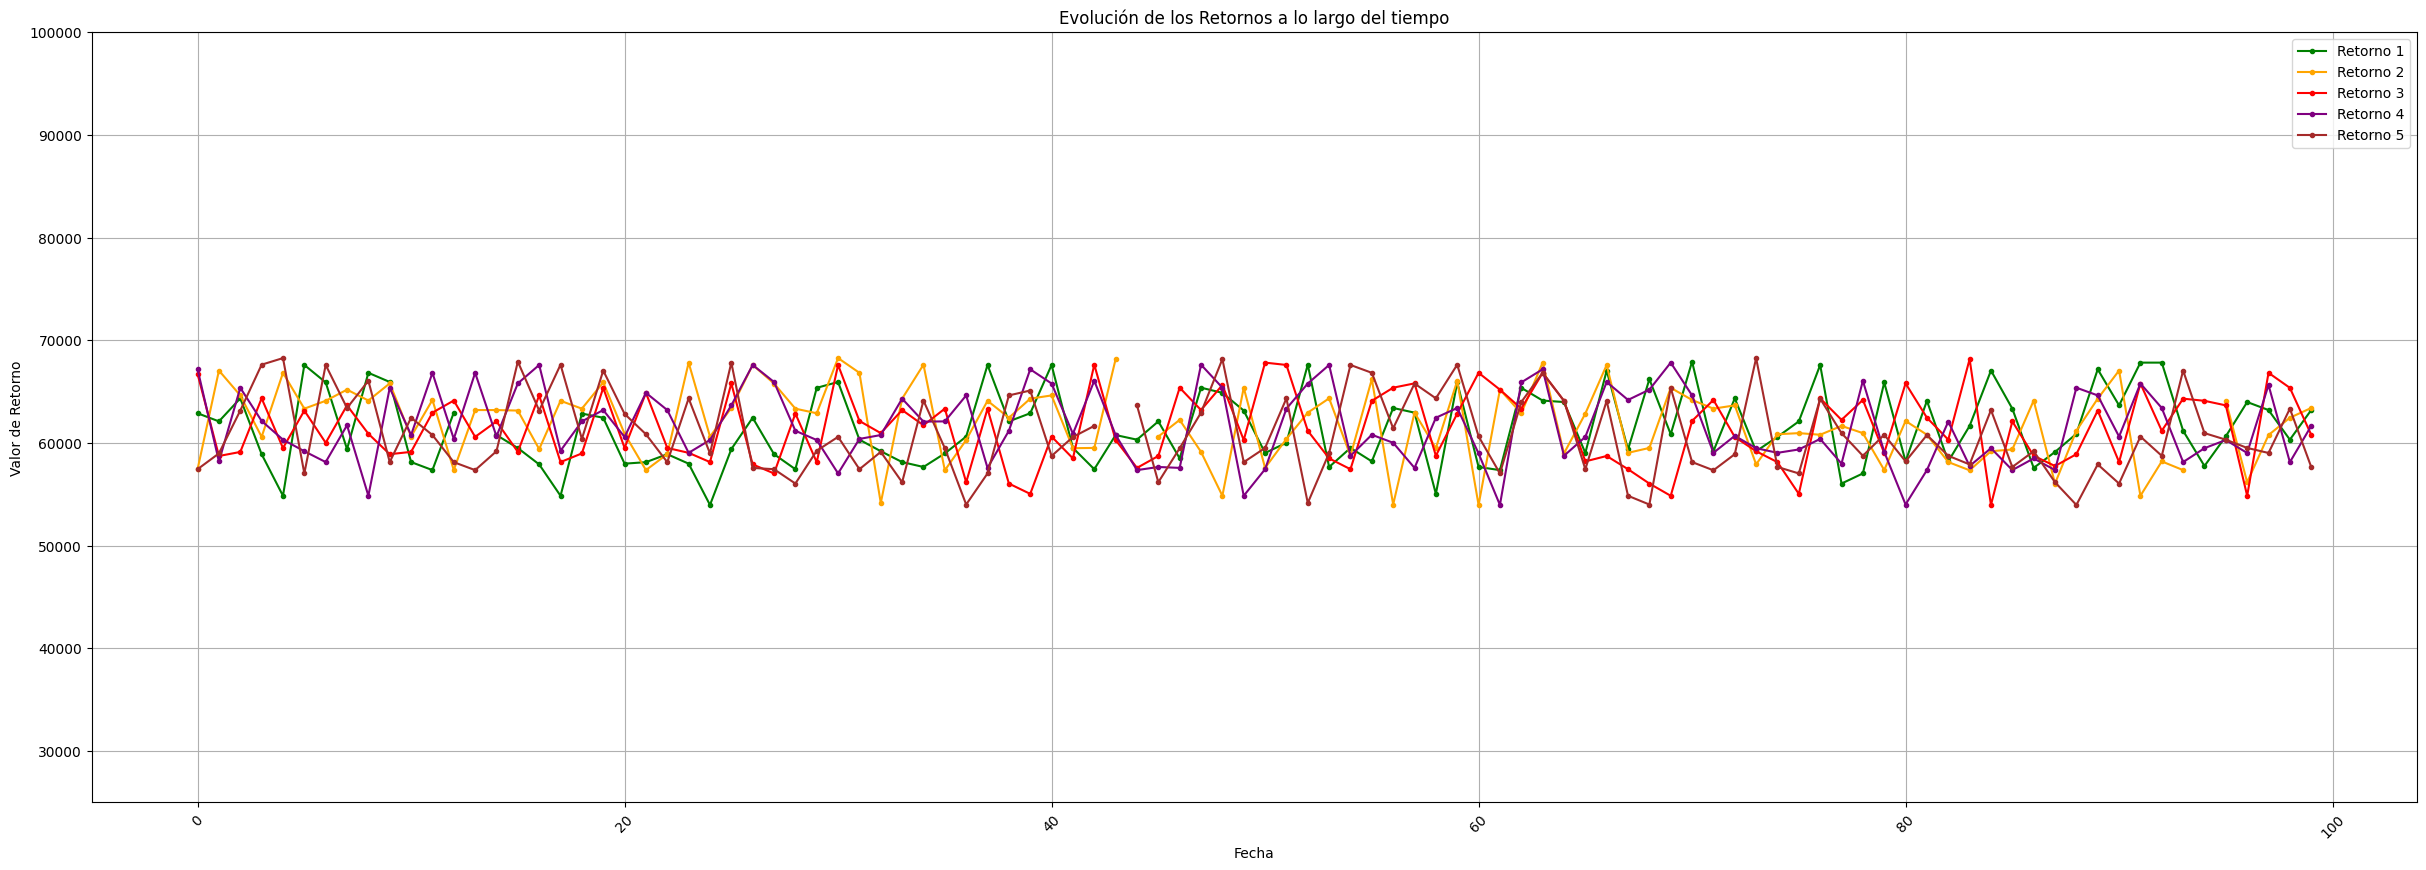

In [45]:
muestras_generadas=np.array([])
num_muestra=1000
for  i in range (num_muestra):
    muestras_generadas=np.append(muestras_generadas,np.random.choice(bitcoin['retorno'],num_registros,replace=True))
muestras_generadas=muestras_generadas.reshape(-1,num_registros)
print (muestras_generadas)
print(bitcoin)

bitcoin_2 = pd.DataFrame({    'retorno': bitcoin['retorno'] ,   'Close': bitcoin['Close']  })
import numpy as np
num_aleatorios = 5
indices_aleatorios = np.random.choice(muestras_generadas.shape[0], size=num_aleatorios, replace=False)
muestras_seleccionadas = muestras_generadas[indices_aleatorios, :]
for i, muestra in enumerate(muestras_seleccionadas):
    
    columna_nombre = f"valor_retorno_{i + 1}"
    
    
    cierre_correspondiente = []
    
    
    for valor_retorno in muestra:
        
        indices_retorno = np.where(bitcoin_2['retorno'] == valor_retorno)[0]
        
        if len(indices_retorno) > 0:
            
            indice = indices_retorno[0]
            cierre_correspondiente.append(bitcoin_2['Close'].iloc[indice])
        else:
            # Si el valor de retorno no se encuentra, se agrega NaN
            cierre_correspondiente.append(np.nan)
    
    
    bitcoin_2[columna_nombre] = cierre_correspondiente

print("DataFrame actualizado con las nuevas columnas:")
print(bitcoin_2)
plt.figure(figsize=(20, 6))
plt.plot(bitcoin_2['Close'], label='Close', color='blue', marker='o')
plt.title('Evolución de la columna Close')
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(30, 10))

# Graficar las diferentes columnas de valor_retorno
plt.plot(bitcoin_2['valor_retorno_1'], label='Retorno 1', color='green', marker='.')
plt.plot(bitcoin_2['valor_retorno_2'], label='Retorno 2', color='orange', marker='.')
plt.plot(bitcoin_2['valor_retorno_3'], label='Retorno 3', color='red', marker='.')
plt.plot(bitcoin_2['valor_retorno_4'], label='Retorno 4', color='purple', marker='.')
plt.plot(bitcoin_2['valor_retorno_5'], label='Retorno 5', color='brown', marker='.')
plt.ylim(25000, 100000)
# Personalizar el gráfico
plt.title('Evolución de los Retornos a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor de Retorno')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.show()